In [562]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [563]:
#load data
df=pd.read_csv('gender_details.csv',delimiter=';')

In [564]:
df.head(10)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0
9,165.100,54.487739,54.0,1


In [565]:
#segregate features and label
feature=df.drop(['male'], axis='columns')
label=df['male']

In [566]:
feature[:5]

,height,weight,age
0,151.765,47.825606,63.0
1,139.700,36.485807,63.0
2,136.525,31.864838,65.0
3,156.845,53.041915,41.0
4,145.415,41.276872,51.0


In [567]:
label[:5]

0    1
1    0
2    0
3    1
4    0
Name: male, dtype: int64

In [568]:
#we have to do nomalize our data 
#b4 normalization we have to have to cvrt feature in numpy array
feature=feature.values
feature=feature.astype('float32')
label=label.astype('int')
feature[:5]

array([[151.765   ,  47.825607,  63.      ],
       [139.7     ,  36.485806,  63.      ],
       [136.525   ,  31.864838,  65.      ],
       [156.845   ,  53.041916,  41.      ],
       [145.415   ,  41.27687 ,  51.      ]], dtype=float32)

In [569]:
#normalize data feature
scale=MinMaxScaler(feature_range=(0,1))
feature=scale.fit_transform(feature)
feature[:5]

array([[0.7817259 , 0.7417954 , 0.7159091 ],
       [0.68527913, 0.54874516, 0.7159091 ],
       [0.6598984 , 0.47007722, 0.7386364 ],
       [0.822335  , 0.83059853, 0.4659091 ],
       [0.7309644 , 0.63030887, 0.5795455 ]], dtype=float32)

In [570]:
#Now i will create a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [596]:
#split your dataset in train and test
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=.3)

In [597]:
#load your prefered classifier
mnb=MultinomialNB()
gnb=GaussianNB()
clf_svc=svm.SVC(C=10,kernel='linear',max_iter=200,degree=2,gamma=.001)
lr=LogisticRegression(C=100,max_iter=120,penalty='l1')

In [598]:
#mnb.fit(x_train,y_train)
#lr.fit(x_train,y_train)
gnb.fit(x_train,y_train)
#clf_svc.fit(x_train,y_train)

GaussianNB(priors=None)

In [599]:
#pred_mnb=mnb.predict(x_test)
#pred_logit=lr.predict(x_test)
#acc,loss=mnb.score(pred_mnb,y_test)
#pred_svc=clf_svc.predict(x_test)
pred_gnb=gnb.predict(x_test)

In [600]:
print(str(accuracy_score(y_test,pred_gnb)*100)+"%")

70.73170731707317%


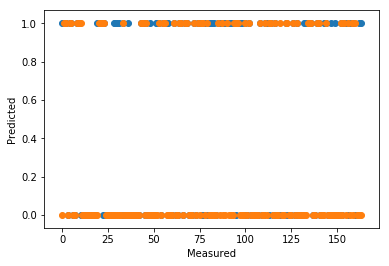

In [606]:
fig, ax = plt.subplots()
ax.scatter(range(y_test.shape[0]),y_test)
ax.scatter(range(y_test.shape[0]),pred_gnb)
plt.show()